In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
# examining the dataframe 
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
202,1/12/2015,Quarter2,finishing,Monday,6,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.817424
275,1/15/2015,Quarter3,sweing,Thursday,10,0.60,22.52,1076.0,10170,23,0.0,0,0,56.5,0.600292
331,1/19/2015,Quarter3,sweing,Monday,5,0.65,20.40,1255.0,8280,35,0.0,0,0,58.0,0.650066
907,2/24/2015,Quarter4,sweing,Tuesday,4,0.80,30.10,901.0,6480,50,0.0,0,1,59.0,0.800072
773,2/15/2015,Quarter3,finishing,Sunday,11,0.60,2.90,NaN,1200,0,0.0,0,0,10.0,0.715333
266,1/15/2015,Quarter3,sweing,Thursday,7,0.80,25.90,1281.0,10170,60,0.0,0,0,56.5,0.850137
153,1/10/2015,Quarter2,sweing,Saturday,7,0.80,25.90,970.0,10170,60,0.0,0,0,56.5,0.850137
510,1/29/2015,Quarter5,sweing,Thursday,5,0.65,20.79,1015.0,7080,81,0.0,0,0,59.0,0.800474
549,2/1/2015,Quarter1,finishing,Sunday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.886500
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data Description
##### 1. date : Date in MM-DD-YYYY
##### 2. day : Day of the Week
##### 3. quarter : A portion of the month. A month was divided into four quarters
##### 4. department : Associated department with the instance
##### 5. team_no : Associated team number with the instance
##### 6. no_of_workers : Number of workers in each team
##### 7. no_of_style_change : Number of changes in the style of a particular product
##### 8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
##### 9. smv : Standard Minute Value, it is the allocated time for a task
##### 10. wip : Work in progress. Includes the number of unfinished items for products
##### 11. over_time : Represents the amount of overtime by each team in minutes
##### 12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
##### 13. idle_time : The amount of time when the production was interrupted due to several reasons
##### 14. idle_men : The number of workers who were idle due to production interruption
##### 15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [5]:
# size of the dataframe 
df.shape

(1197, 15)

In [6]:
# corrolation of features in the dataset
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [7]:
# basis stats for the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [8]:
# Questions I want to answer from EDA
# Univariate Analysis
#1. How many task are in finishing and sewing deparment
#2. What is the distribution of task across the quater
#3. What is the distrubution of the targeted productivity 
#4. What is the distribution of the actual productivity
#5. How much incentives were paid out each month
# Bivariate Analysis
#1. Work in progress by department
    #1a. Work in progress by teams
#2. Productivity of department each quarter
#3. Idle men by department. 
    #3a. Which teams had the most idle men?
#4. Overtime by department
    #4b. Which team had the most overtime
#5. Incentives paid out by department
    #5b. which team had the highest incentives
#6. When do you have the highest amount of overtime


In [9]:
# checking for sum of missing values for each feature
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
# converting the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [11]:
# grabbing the month name
df['month'] = df['date'].dt.month_name()

In [12]:
# converts overtime to hours 
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60)

In [13]:
# counts total number of values for each quarter 
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [14]:
# counts the total number of values for each day
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [15]:
# counts the total number of values for each month
df['month'].value_counts()

January     542
February    443
March       212
Name: month, dtype: int64

In [16]:
# counts the total number of value for each department
df['department'].value_counts().index

Index(['sweing', 'finishing ', 'finishing'], dtype='object')

In [17]:
# changes department column to finsihing or sewing
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing' or 'finishing') else 'sewing') 

In [18]:
df['department'].value_counts().index

Index(['sewing', 'finishing'], dtype='object')

In [23]:
# create department df with total counts and rename columns 
department = df['department'].value_counts().reset_index()
department.rename(columns= {'index':'department','department':'total_count'},inplace=True)

# EDA 

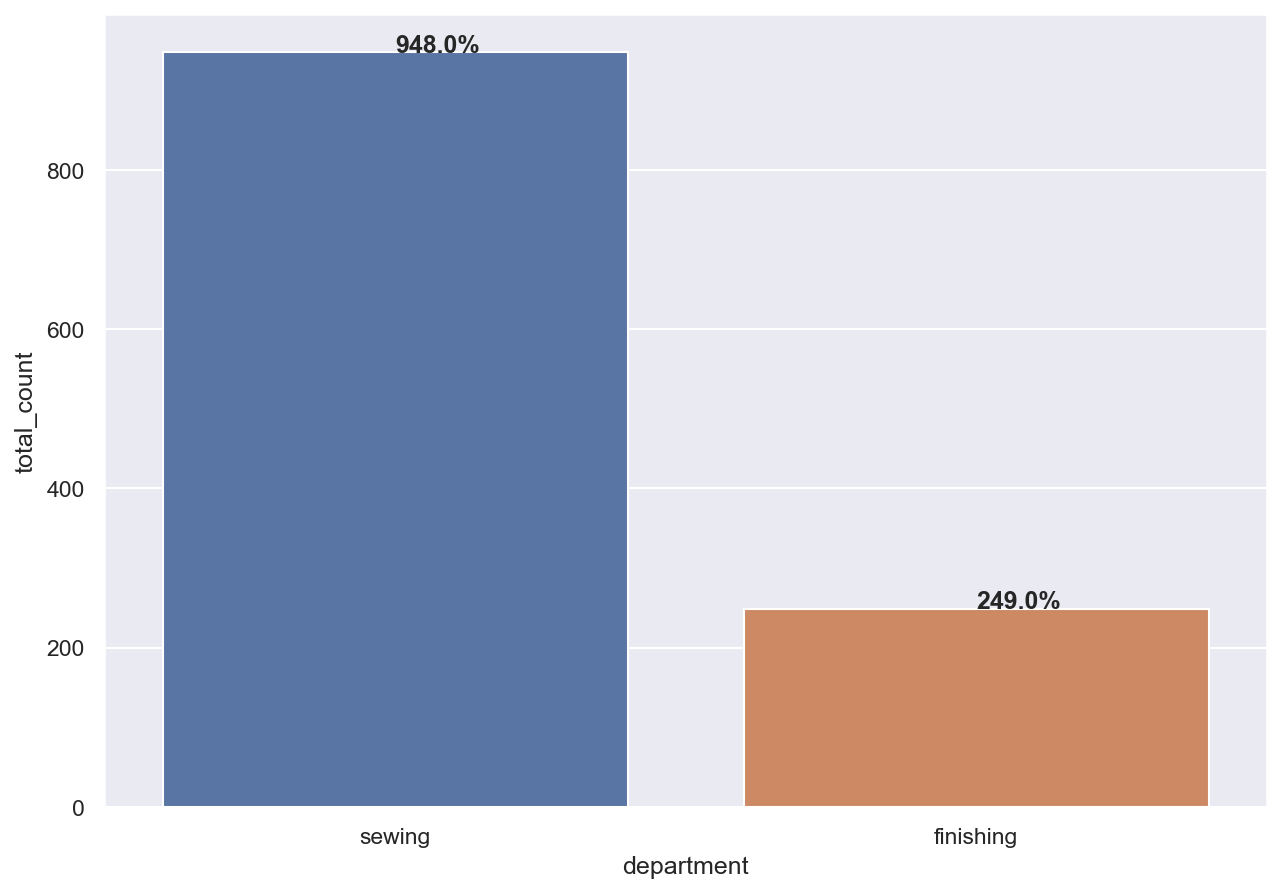

In [284]:
# plotting the number of entries per department. (comeback to display number)
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,7),dpi=150)
ax = sns.barplot(data=department,x=department['department'],y= department['total_count'])
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%" %rect.get_height(), weight='bold' )


([<matplotlib.patches.Wedge at 0x7fbcbbf4f650>,
 [Text(-0.8733473535808534, 0.6687782891162961, 'department'),
  Text(0.8733473848886237, -0.6687782482319549, 'total_count')],
 [Text(-0.39697606980947875, 0.3039901314164982, '79.2%'),
  Text(0.3969760840402835, -0.3039901128327067, '20.8%')])

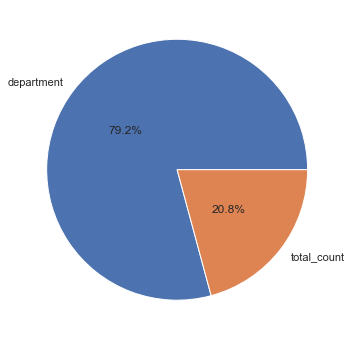

In [282]:
#department.plot.pie(autopct="%.1f%%",y='total_count');
pie, ax = plt.subplots(figsize=[10,6])
labels = department.keys()
plt.pie(data=department, x='total_count', autopct="%.1f%%", labels=labels, pctdistance=0.5)


In [57]:
# isolating the entries per quarter
quarters = df['quarter'].value_counts().reset_index()
quarters.rename(columns={'index':'quarter','quarter':'total_count'},inplace=True)

<AxesSubplot:xlabel='quarter', ylabel='total_count'>

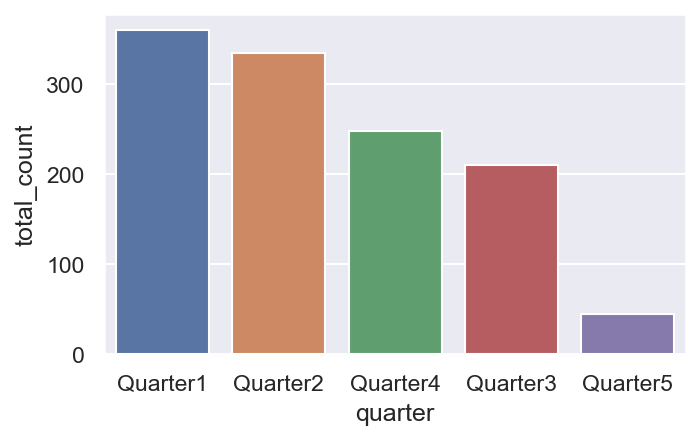

In [223]:
# plotting the number of task per qaurter 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(data=quarters,x='quarter',y= 'total_count')

<AxesSubplot:xlabel='targeted_productivity', ylabel='Count'>

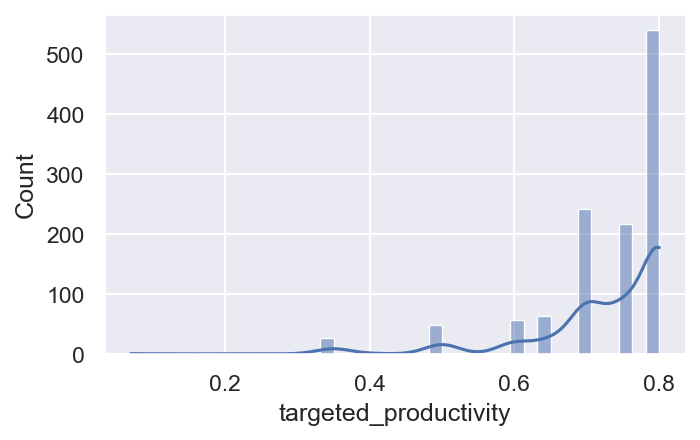

In [99]:
# plotting the distribution of targeted peoductivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['targeted_productivity'],kde=True)

<AxesSubplot:xlabel='actual_productivity', ylabel='Count'>

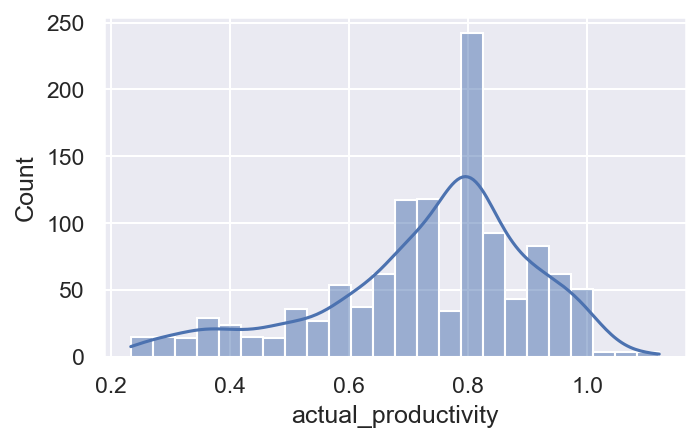

In [100]:
# plotting the distribution of actual productivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['actual_productivity'],kde=True)

In [232]:
#isolating the sum of incentives per month 
incentives = df[['month','incentive']].groupby('month',as_index=False,sort= False).agg({'incentive':'sum'})

In [233]:
incentives

,month,incentive
0,January,15315
1,February,10827
2,March,19596


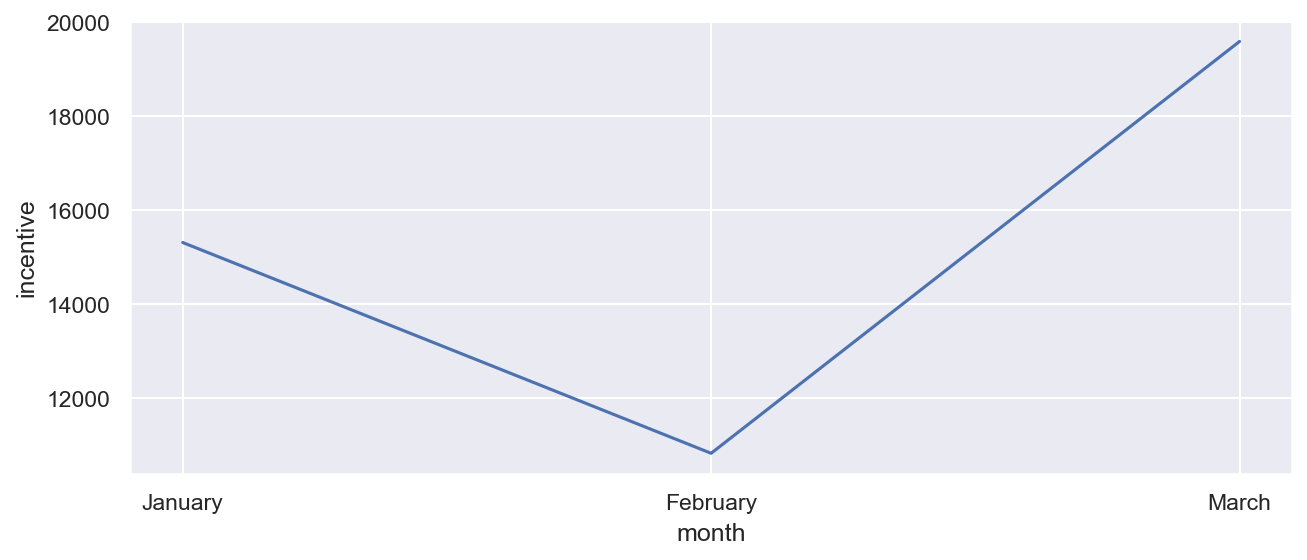

In [234]:
# plotting the total incentives per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.lineplot(data=incentives,x='month',y='incentive',
                 palette='Paired',sort=True,markers=True,estimator='mean')

In [218]:
# average work in progress per team
work_in_progress_per_team = df[['month','wip','team']].groupby('team',as_index=False).mean()

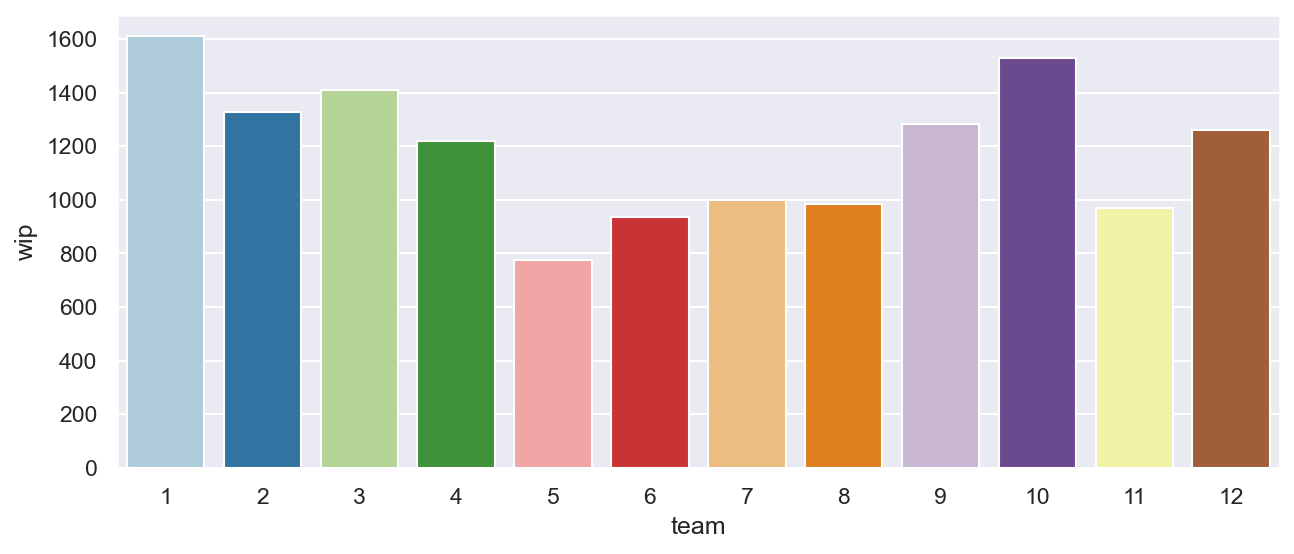

In [221]:
# plotting the average number of unfinished items per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=work_in_progress_per_team,x='team',y='wip',
                 palette='Paired')

In [248]:
# average working in progress per month
work_in_progress_per_month =  df[['month','wip']].groupby('month',sort=False).mean()

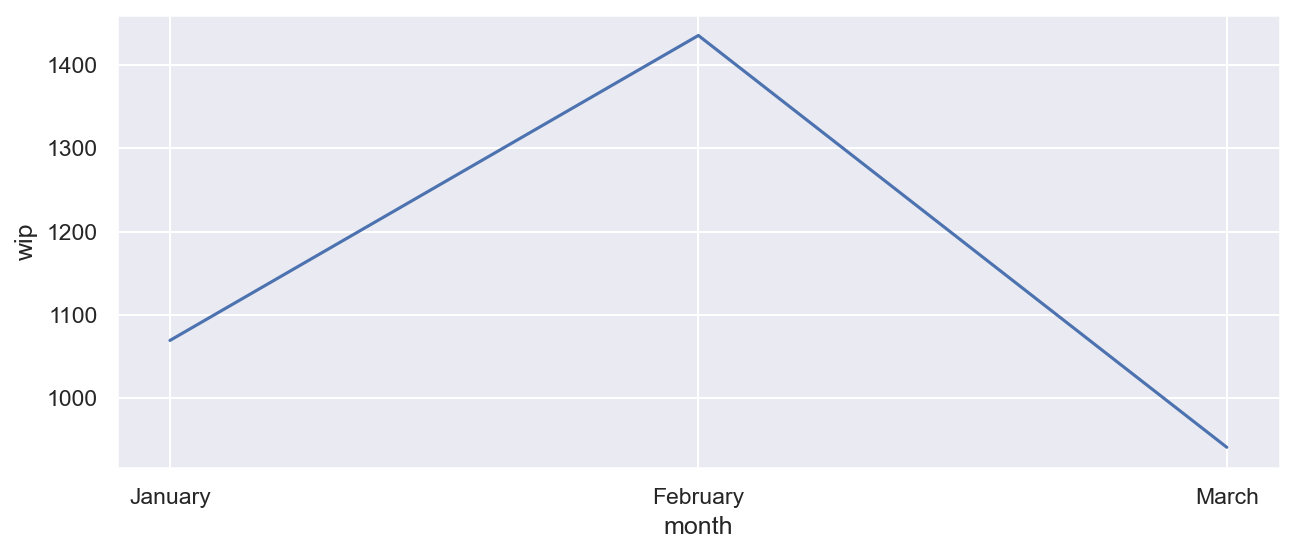

In [249]:
# plotting the average number of unfinished items per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.lineplot(data=work_in_progress_per_month,x='month',y='wip',
                 palette='Paired',sort=False)

In [256]:
# average idle men per team
idle_men_per_team = df[['team','idle_men']].groupby('team',as_index=False).agg({'idle_men':'mean'})

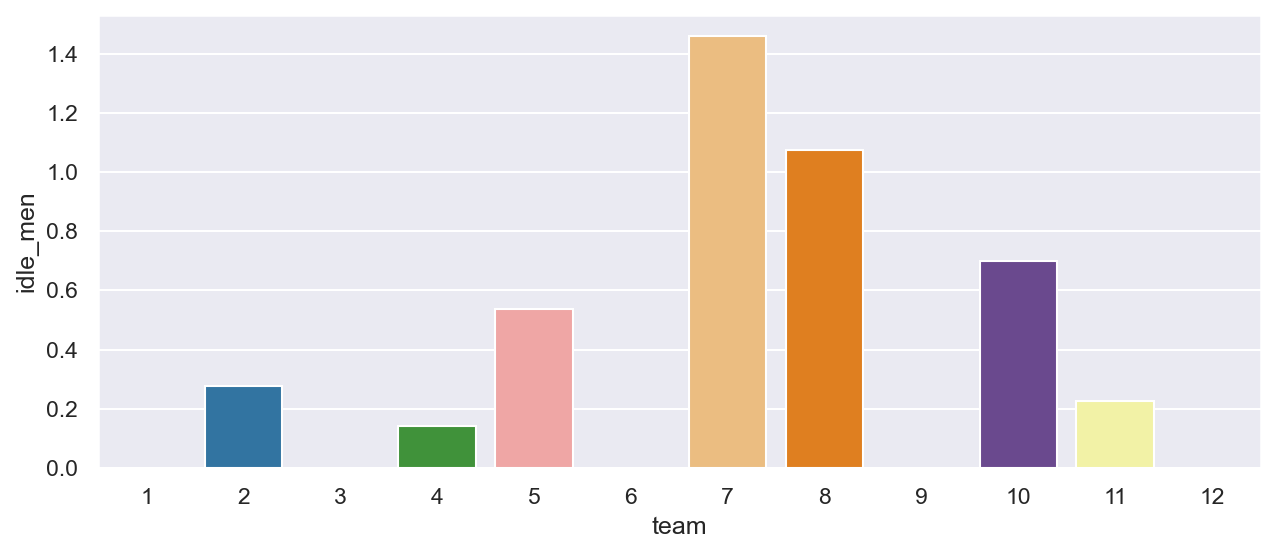

In [257]:
# plotting average idle men per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=idle_men_per_team,x='team',y='idle_men',
                 palette='Paired')

In [246]:
# average overtime in hours per team
    
over_time_per_team = df[['team','overtime_in_hours']].groupby('team',
                                            as_index=False).agg({'overtime_in_hours':'mean'})

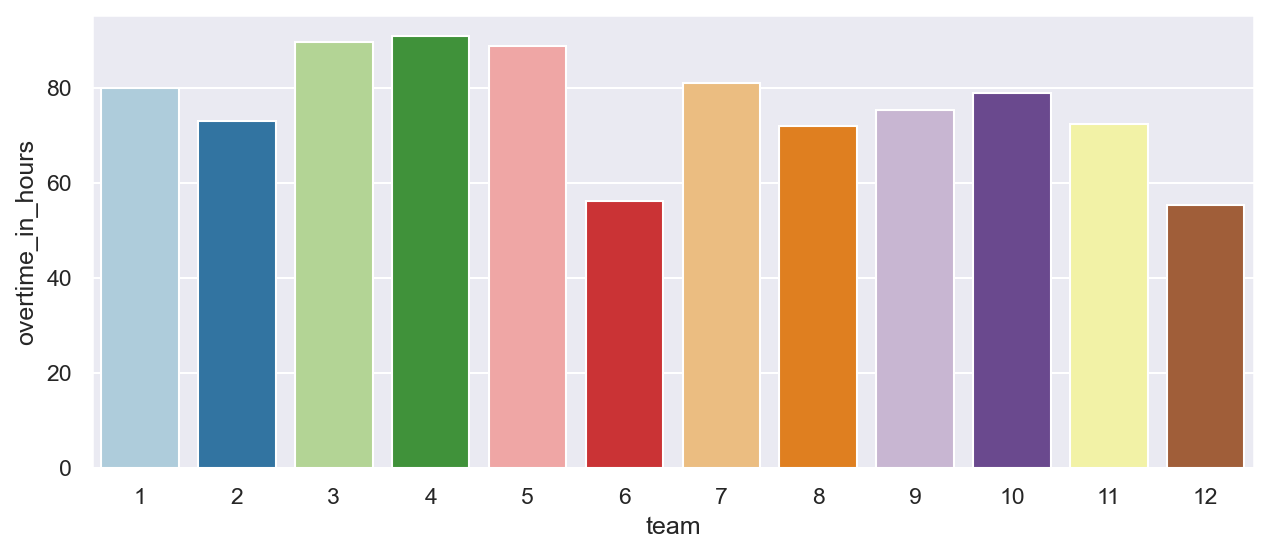

In [247]:
# plotting the average overtime per team 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=over_time_per_team,x='team',y='overtime_in_hours',
                 palette='Paired')

In [263]:
# sum of incentives per team
incentives_per_team = df[['team','incentive']].groupby('team',
                                                as_index=False).agg({'incentive':'sum'})

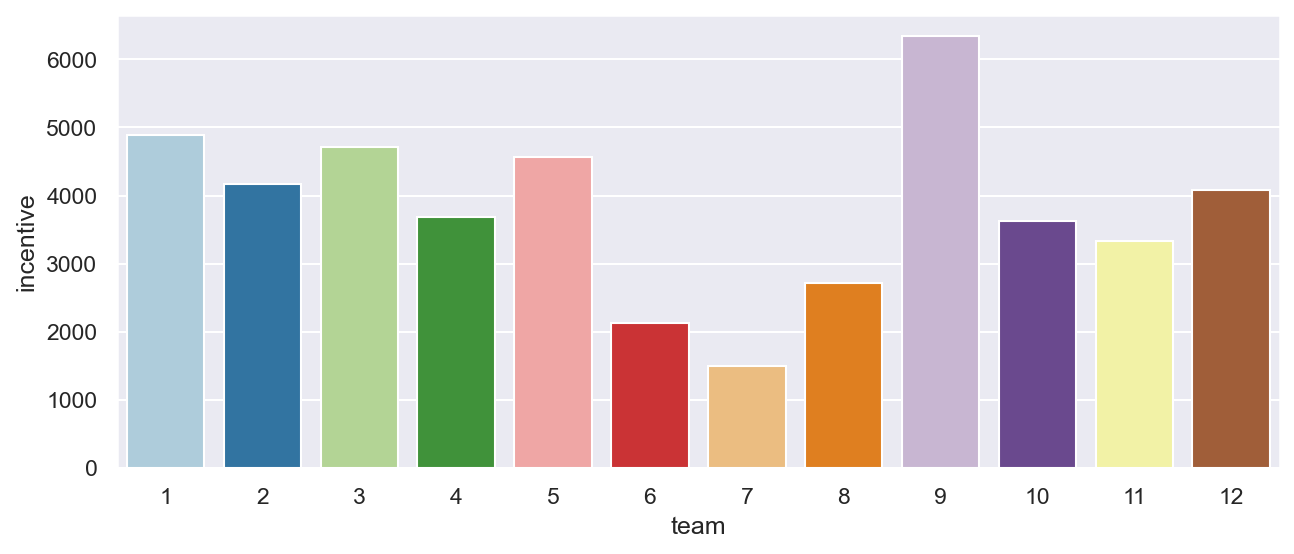

In [264]:
# plotting total incentives per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=incentives_per_team,x='team',y='incentive',
                 palette='Paired')

In [265]:
# average monthly overtime trend 
overtime_per_month = df[['month','overtime_in_hours']].groupby('month',
                                                sort=False).agg({'overtime_in_hours':'mean'})

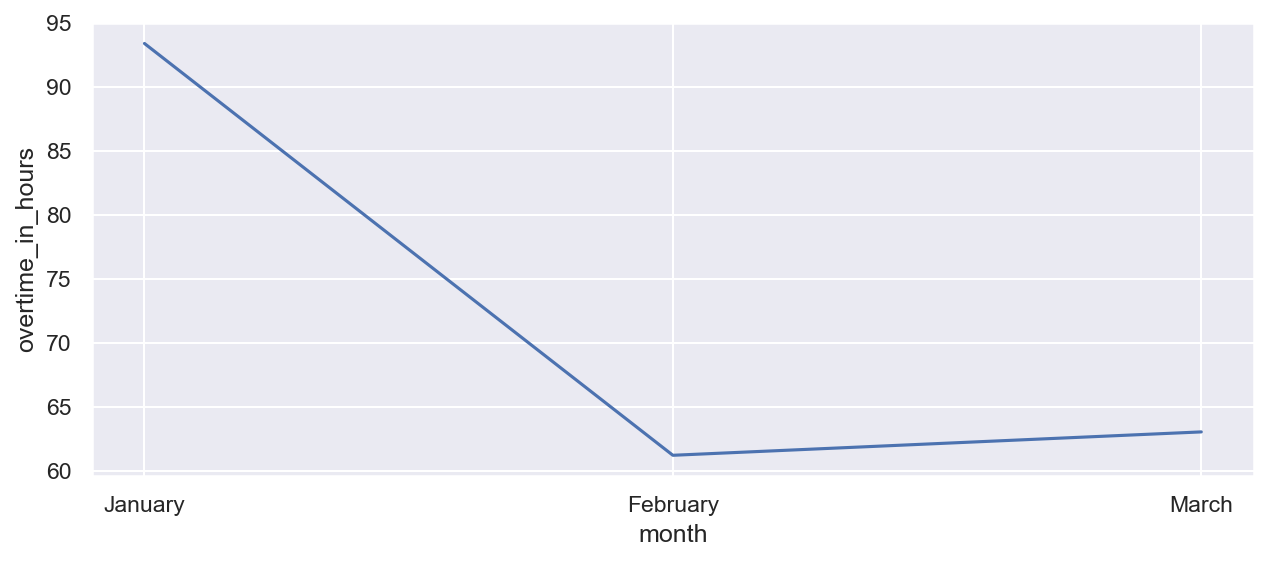

In [266]:
# plotting the average monthly overtime trend
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.lineplot(data=overtime_per_month,x='month',y='overtime_in_hours',
                 palette='Paired',sort=False)

In [ ]:
#7. What month has the highest SMV? 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.lineplot(data=overtime_per_month,x='month',y='overtime_in_hours',
                 palette='Paired',sort=False)